# PME3481 - Controle e Aplicações

## Síntese por Alocação de Polos

Se baseia em alocar os polos já existentes no sistema de modo a conseguir estabilizá-lo adequadamente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import scipy

### Definição do Sistema

Agora, utilizando nas matrizes do problema

In [2]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0
Vvlin = 2.2

In [3]:
# X = [theta,xp,yp,thetap]
# Xp = [thetap,xpp,ypp,thetapp]
# A = np.array([
#     [0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
#     [4.40301920e-01, -2.53575404e-03,  0.00000000e+00,  0.00000000e+00],
#     [-9.79343488e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
#     [4.91991402e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]
# ])
A = np.array([[0, 0, 0, 1],
              [(1/M)*((1/2)*dar*Cd*Vxlin**2*L*Df + (1/2)*dar*Cd*L*Df*Vvlin**2), (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [(1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2) - (1/2)*dar*Cd*(np.pi*(Df/2)**2)*Vvlin**2), 0, 0, 0],
              [(1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)- (1/2)*dar*Cd*Xpe*(np.pi*(Df/2)**2)*Vvlin**2), 0, 0, 0]])

# u = [T,tau]

# B = np.array([[0, 0, 0],
#               [1/M, 0, 0],
#               [0, -Tlin/M, - (1/2)*dar*Cd*L*Df*2*Vvlin/M],
#               [0, -Tlin*Xcm/Izz, - (1/2)*dar*Cd*Xpe*L*Df*2*Vvlin/Izz]]) 

E = np.array([[0],
              [0],
              [ (- (1/2)*dar*Cd*L*Df*2*Vvlin)/(M)],
              [(- (1/2)*dar*Cd*Xpe*L*Df*2*Vvlin)/(Izz)]])



B = np.array([[0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([
    [0.,  1.,  0.,  0.],
    [0.,  0.,  1.,  0.]
])

D = np.array([
    [0.,  0.],
    [0.,  0.]
])

cont = ctrl.StateSpace(A, B, C, D)

sys = ctrl.ss(A, B, C, D)
sys

<LinearIOSystem:sys[3]:['u[0]', 'u[1]']->['y[0]', 'y[1]']>

Algumas análises do modelo

### Polos em Malha Aberta

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\control\lti.py:118: RuntimeWarning: invalid value encountered in divide
  zeta = -real(splane_poles)/wn


[-0.00253575+0.j  0.        +0.j  0.0701421 +0.j -0.0701421 +0.j]


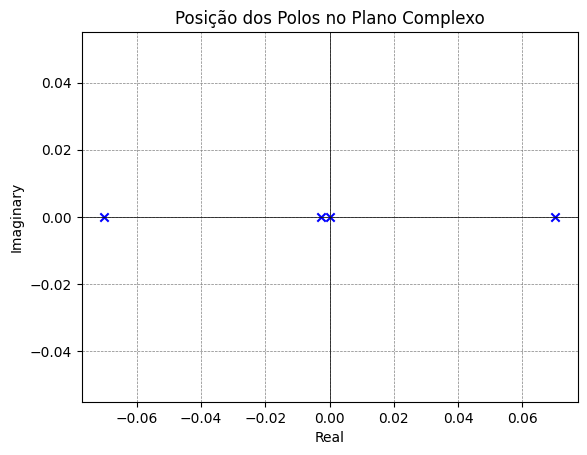

In [4]:
wn, zeta, poles = cont.damp()
print(poles)

# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

In [5]:
# Create the state-space model
sys = ctrl.ss(A, B, C, D)

### Alocação de Polos

In [6]:
# Desired poles
p = [-1,  -0.5 ,  -0.5 ,-2]

#p = [-2.5,-2.5, -3,-1]

# Calculate the gain matrix K using pole placement
Kbun = scipy.signal.place_poles(A, B, p, method='YT')
K = Kbun.gain_matrix
print(K)

# Compute the closed-loop system
Acl = A - np.dot(B, K)
syscl = ctrl.ss(Acl, B, C, D)
# Print the poles of the closed-loop system
wn, zeta , p = sys.damp()
print("Poles of the opened-loop system:", p)
#print("Zetas of the opened-loop system:", zeta)
#print("Wns of the opened-loop system:", wn)

wnk, zetak , pk = syscl.damp()
print("Poles of the closed-loop system:", pk)
print("Zetas of the closed-loop system:", zetak)
#print("Wns of the closed-loop system:", wnk)

#[-1. +0.j -3. +0.j -2.5+0.j -2.5+0.j]

[[ 1.03669087e+01  1.17127957e+01  2.08064283e-14 -1.60743642e-13]
 [-2.17757345e-01  1.60568686e-17  6.34201043e-03 -2.21310240e-01]]
Poles of the opened-loop system: [-0.00253575+0.j  0.        +0.j  0.0701421 +0.j -0.0701421 +0.j]
Poles of the closed-loop system: [-2. +0.j -1. +0.j -0.5+0.j -0.5+0.j]
Zetas of the closed-loop system: [1. 1. 1. 1.]


Os polos, em malha fechada, podem ser posicionados no plano como na figura abaixo

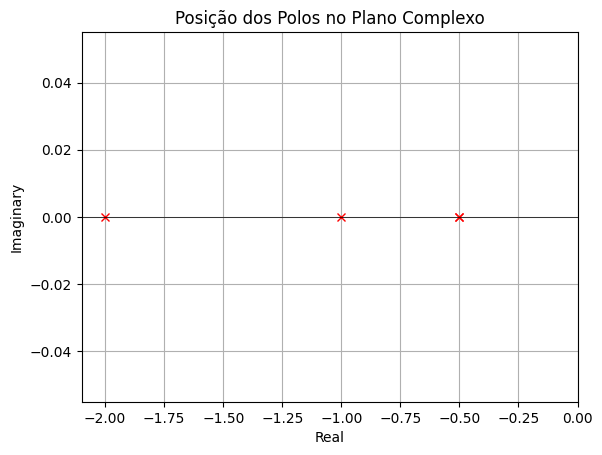

In [7]:
plt.figure(1)
ax = plt.gca()
#plt.plot(p.real, p.imag, 'bx',label = 'Polos em malha aberta' )
plt.plot(pk.real, pk.imag, 'rx',label = 'Polos em malha fechada')
plt.box(on = bool)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim([-2.1,0])
plt.title('Posição dos Polos no Plano Complexo')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.grid()
plt.show()

In [8]:
u = [0, 0]
X0  = [0.1, 10, 0, 0]
tempo = np.linspace(0, 30, 300000)

t, amp,yr = ctrl.forced_response(syscl, tempo, 0 ,X0,return_x = 'True')

### Respostas em Malha Fechada sem Perturbação

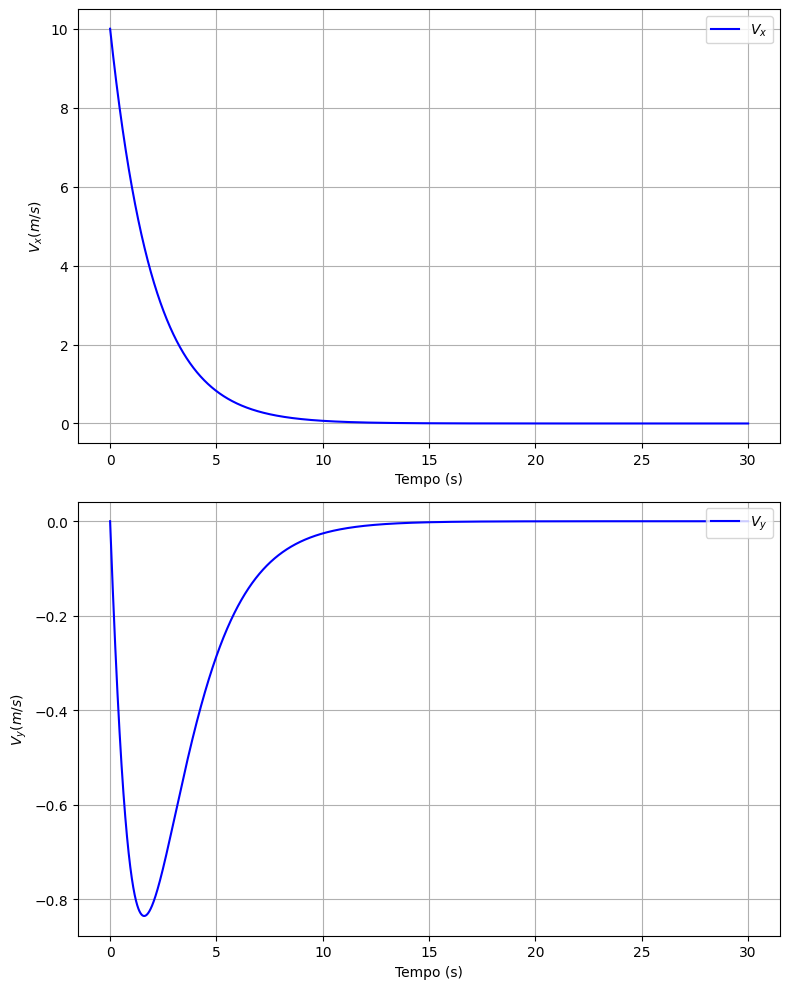

In [9]:
# Criando os subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plt.grid(True)

# Plot Vx
axes[0].plot(t, yr[1], color='blue')
axes[0].set_ylabel(r'$V_x (m/s)$')
axes[0].set_xlabel('Tempo (s)')
axes[0].legend([r'$V_x$'], loc='upper right')
axes[0].grid(True)

# Plot Vy
axes[1].plot(t, yr[2], color='blue')
axes[1].set_ylabel(r'$V_y (m/s)$')
axes[1].set_xlabel('Tempo (s)')
axes[1].legend([r'$V_y$'], loc='upper right')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [10]:
u = np.dot(-K,yr)

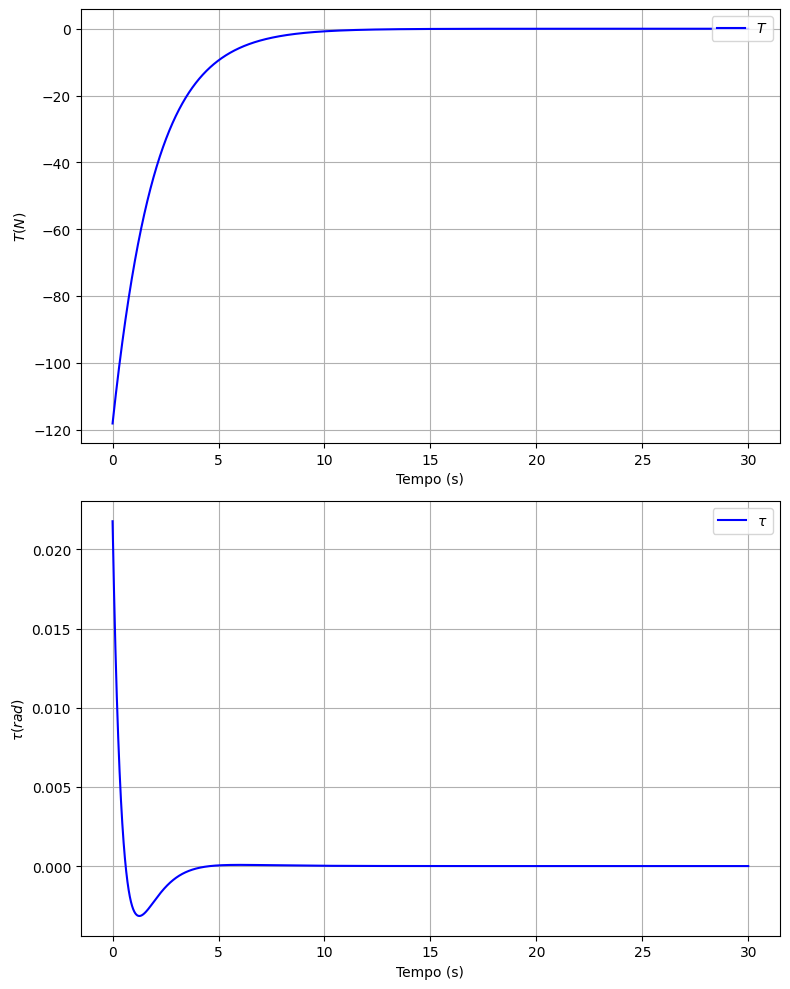

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot Theta
axes[0].plot(t, u[0], color='blue')
axes[0].set_ylabel(r'$T (N)$')
axes[0].set_xlabel('Tempo (s)')
axes[0].legend([r'$T$'], loc='upper right')
axes[0].grid(True)

# Plot VX
axes[1].plot(t, u[1], color='blue')
axes[1].set_ylabel(r'$\tau (rad)$')
axes[1].set_xlabel('Tempo (s)')
axes[1].legend([r'$\tau$'], loc='upper right')
axes[1].grid(True)

plt.tight_layout()
plt.grid(True)
plt.show()

### Resposta em Malha Fechado com Perturbação

In [12]:
Abarra = A - np.dot(B,K)
print(Abarra)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 2.04836148e-14 -5.00000000e-01 -8.83687761e-16  6.82708182e-15]
 [-1.19258754e+01  1.57240697e-16  6.21056422e-02 -2.16723304e+00]
 [-3.50000000e+00  2.58443814e-16  1.02078020e-01 -3.56210564e+00]]


In [13]:
sys = ctrl.ss(Abarra,E,C,0)
wn,z,pole = sys.damp()
pole

array([-2. +0.j, -1. +0.j, -0.5+0.j, -0.5+0.j])

In [14]:
def step(n,v):
    m1 = np.zeros(n//4)
    m3 = np.zeros(n-len(m1))
    m3 = m3 + v
    return np.block([m1,m3])

In [15]:
# X0 = [0,0,0,0]
x0 = [0.2, 5, -1, 0.1] 
vento = 10
tempo = np.linspace(0, 30, 300000)
res = ctrl.forced_response(sys, tempo, step(len(tempo),vento) ,X0 ,return_x = 'True')

In [16]:
X0 = [0.1, 5, -1, 0.1]
# X0 = [0.2, 5, -1, 0.1] 
vento = 10
tempo = np.linspace(0, 30, 300000)
res = ctrl.forced_response(sys, tempo, step(len(tempo),vento) ,X0 ,return_x = 'True')

In [17]:
res = ctrl.forced_response(sys, tempo, step(len(tempo), vento), x0, return_x=True)
t, y, x = res

In [18]:
x = res.states
e = res.inputs

Entrada em Degrau

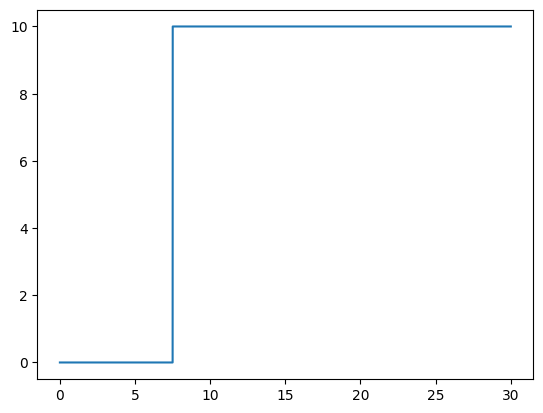

In [19]:
plt.plot(t,e[0])

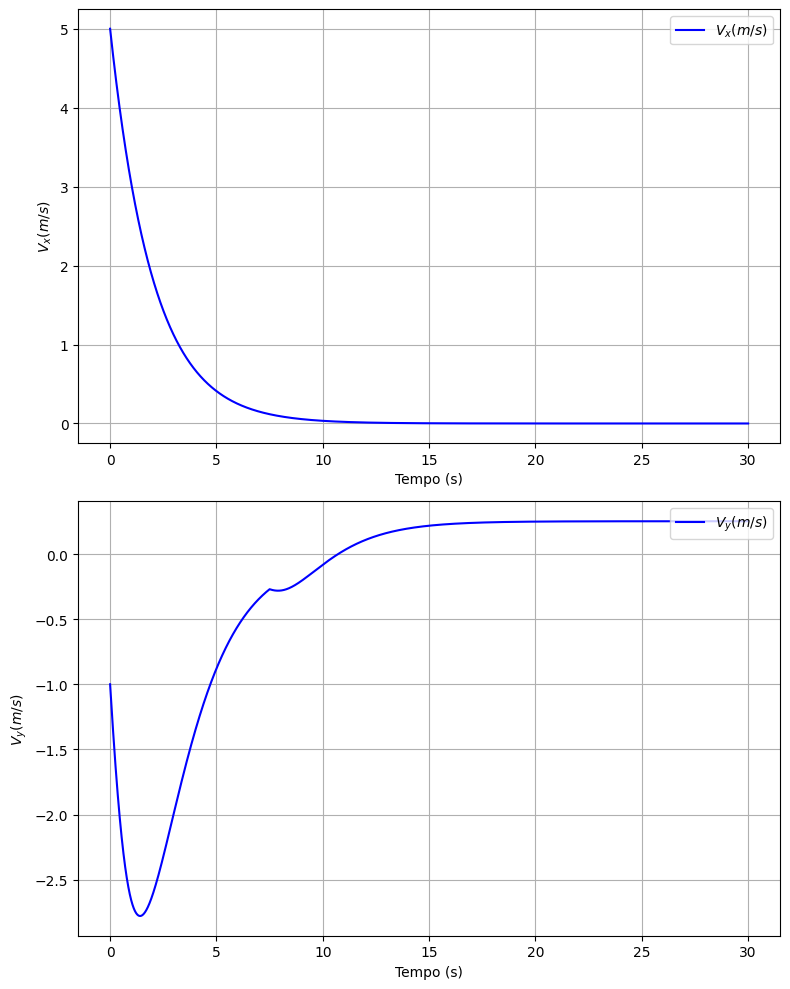

In [24]:
# Criando os subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot Vx
axes[0].plot(t, x[1], color='blue')
axes[0].set_ylabel(r'$V_x (m/s)$')
axes[0].set_xlabel('Tempo (s)')
axes[0].legend([r'$V_x (m/s)$'], loc='upper right')
axes[0].grid(True)

# Plot Vy
axes[1].plot(t, x[2], color='blue')
axes[1].set_ylabel(r'$V_y (m/s)$')
axes[1].set_xlabel('Tempo (s)')
axes[1].legend([r'$V_y (m/s)$'], loc='upper right')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [21]:
xsim = res.states

Text(0, 0.5, 'dθ (rad/s)')

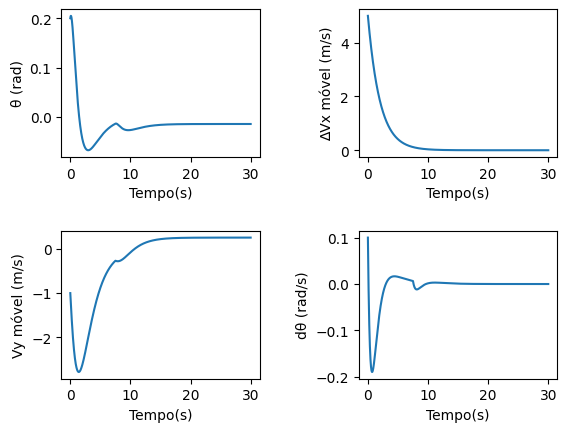

In [22]:
f,((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2)
plt.subplots_adjust( wspace=0.5,hspace=0.5)
ax1.set_xlabel('Tempo(s)')
ax2.set_xlabel('Tempo(s)')
ax3.set_xlabel('Tempo(s)')
ax4.set_xlabel('Tempo(s)')

ax1.plot(t, xsim[0])
ax1.set_ylabel('θ (rad)')
ax2.plot(t, xsim[1])
ax2.set_ylabel('∆Vx móvel (m/s)')
ax3.plot(t, xsim[2])
ax3.set_ylabel('Vy móvel (m/s)')
ax4.plot(t, xsim[3])
ax4.set_ylabel('dθ (rad/s)')